In [1]:
# Pre-requisites
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns


# Preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
# Classifiers from scikit-learn
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier

# Performance metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

from scipy.stats import pointbiserialr
flight_data = pd.read_csv("D:\Python(New)\Project\Mid_Term_Project\Colin\clean\\flights_with_features_test.csv")

In [2]:
# extract year from flight date
flight_data['year'] = pd.DatetimeIndex(flight_data['fl_date']).year
flight_data['month'] = pd.DatetimeIndex(flight_data['fl_date']).month
flight_data['day_of_month'] = pd.DatetimeIndex(flight_data['fl_date']).day
# fill na values in arrive delay
flight_data['arr_delay'] = flight_data['arr_delay'].fillna(flight_data['arr_delay'].median())

In [3]:
# convert data time as string
flight_data['crs_dep_time'] = flight_data['crs_dep_time'].astype('str')
flight_data['crs_arr_time'] = flight_data['crs_arr_time'].astype('str')
# add leading zero to the front of missing digit
flight_data['crs_dep_time'] = flight_data['crs_dep_time'].apply(lambda x: '{0:0>4}'.format(x))
flight_data['crs_arr_time'] = flight_data['crs_arr_time'].apply(lambda x: '{0:0>4}'.format(x))

In [4]:
flight_data.drop(columns = ['fl_date',
                            'mkt_unique_carrier',
                            'origin_city',
                            'origin_state',
                            'dest_city',
                            'dest_state',
                           'dep_delay'],
                 axis = 1,
                 inplace=True
                )

In [5]:
flight_data

,day_of_the_week,month,origin,dest,crs_dep_time,taxi_out,taxi_in,crs_arr_time,air_time,arr_delay,...,dest_windchillc,dest_precipinches,dest_humidity,dest_visibilitymiles,dest_pressureinches,dest_dewpointc,dest_cloudcover,dest_uvindex,year,day_of_month
0,Thursday,2,STL,ORD,1145,10,11,1305,58,-2.0,...,-16,0.0,42,6,30,-18,0,2,2018,1
1,Monday,10,DFW,GRI,2120,19,4,2303,77,-8.0,...,14,0.0,65,6,30,8,8,1,2018,1
2,Friday,6,LIT,DFW,0852,10,9,1025,49,-34.0,...,23,0.0,92,6,30,22,70,5,2018,1
3,Monday,1,DCA,MEM,1621,12,3,1749,122,143.0,...,-14,0.0,34,6,31,-20,0,2,2018,1
4,Tuesday,5,SYR,ORD,1811,8,12,1924,94,-22.0,...,21,0.0,51,6,30,10,8,1,2018,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1024,Friday,2,ABQ,DAL,1605,11,4,1845,82,37.0,...,12,0.0,74,5,30,7,75,1,2019,1
1025,Friday,11,ATL,BWI,0830,13,2,1020,79,-14.0,...,1,0.0,62,6,30,-1,0,3,2019,1
1026,Sunday,12,ABQ,BWI,1200,12,4,1735,177,1.0,...,3,0.2,96,4,30,6,100,2,2019,1
1027,Tuesday,1,ABQ,BWI,0930,15,4,1500,173,-20.0,...,10,0.0,62,6,30,5,8,4,2019,1


A **correlation coefficient** measures the extent to which two variables tend to change together. The coefficient describes both the strength and the direction of the relationship.
A **point-biserial correlation** is used to measure the strength and direction of the association that exists between **one continuous variable and one dichotomous variable.**

In [6]:
# encode categorical data into numeric values
labelEncoder = LabelEncoder()
flight_data["day_of_the_week"] = labelEncoder.fit_transform(flight_data["day_of_the_week"])
flight_data['origin'] = labelEncoder.fit_transform(flight_data['origin'])
flight_data['dest'] = labelEncoder.fit_transform(flight_data['dest'])
flight_data['origin_weather_condn'] = labelEncoder.fit_transform(flight_data['origin_weather_condn'])
flight_data['origin_winddir16point'] = labelEncoder.fit_transform(flight_data['origin_winddir16point'])
flight_data['dest_weather_condn'] = labelEncoder.fit_transform(flight_data['dest_weather_condn'])
flight_data['dest_winddir16point'] = labelEncoder.fit_transform(flight_data['dest_winddir16point'])
flight_data['crs_dep_time'] = labelEncoder.fit_transform(flight_data['crs_dep_time'])
flight_data['crs_arr_time'] = labelEncoder.fit_transform(flight_data['crs_arr_time'])

# categorical and numeric data
categorical = ['year','month','day_of_week','day_of_month','origin','dest','origin_weather_cond','origin_winddir16point','dest_weather_condn','dest_winddir16point','crs_dep_time']
numerical = ['taxi_out','taxi_in','air_time','distance','origin_tempc','origin_windspeedmiles','origin_windgustmiles','origin_windchillc','origin_precipinches','origin_humidity','origin_visibilitymiles','origin_pressureinches','origin_dewpointc','origin_cloudcover','origin_uvindex','dest_tempc','dest_windspeedmiles','dest_windgustmiles','dest_windchillc','dest_precipinches','dest_humidity','dest_visibilitymiles','dest_pressureinches','dest_dewpointc','dest_cloudcover','dest_uvindex']
target = flight_data['arr_delay']

# check p-values and corrcoeff
pbc = list()
for col in numerical:
    ans = pointbiserialr(flight_data[col], target)
    pbc.append([col, ans[0], ans[1]])
    
pbc_corr = pd.DataFrame(pbc, columns=["Feature", "CorrCoeff", "pValue"]).sort_values(by="CorrCoeff", ascending=False).reset_index(drop=True)
pbc_corr

,Feature,CorrCoeff,pValue
0,taxi_out,0.175118,1.564207e-08
1,origin_pressureinches,0.088999,4.275247e-03
2,taxi_in,0.084874,6.445571e-03
3,dest_pressureinches,0.057757,6.402320e-02
4,dest_humidity,0.041371,1.848241e-01
5,dest_precipinches,0.039947,2.004176e-01
6,origin_humidity,0.031896,3.066955e-01
7,dest_windgustmiles,0.007890,8.004263e-01
8,dest_windspeedmiles,0.004943,8.741547e-01
9,origin_windspeedmiles,0.003143,9.197768e-01


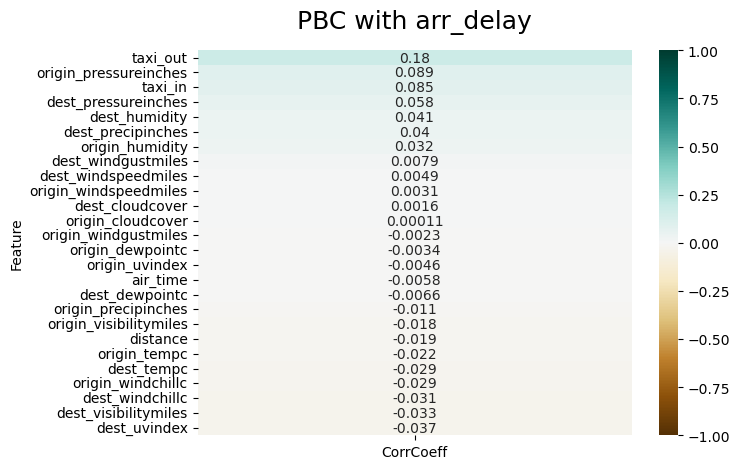

In [7]:
plt.figure(figsize=(7, 5))
pbc_corr = pbc_corr.set_index("Feature")
heatmap = sns.heatmap(pbc_corr[["CorrCoeff"]].sort_values(by="CorrCoeff", ascending=False), vmin=-1, vmax=1, annot=True, cmap="BrBG")
heatmap.set_title("PBC with arr_delay", fontdict={"fontsize":18}, pad=16);
del pbc_corr

### Feature Selection

In [8]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
flight_scaled = scaler.fit_transform(flight_data)

In [9]:
flight_data_scaled =  pd.DataFrame(flight_scaled, columns=flight_data.columns)

In [10]:
X = flight_data_scaled.loc[:, flight_data_scaled.columns != "arr_delay"]
y = np.array(flight_data_scaled.loc[:, flight_data_scaled.columns == "arr_delay"]["arr_delay"])

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=26)

In [11]:
def make_num_tree_plot(X_train, y_train, X_test, y_test, num_trees):
    """
    Make number of trees vs error rate plot for RandomForestClassifier
   
    Parameters
    ----------
    X_train: numpy.ndarray        
        The X part of the train set
    y_train: numpy.ndarray
        The y part of the train set    
    X_test: numpy.ndarray        
        The X part of the test/validation set
    y_test: numpy.ndarray
        The y part of the test/validation set    
    num_trees: int
        The value for `n_estimators` argument of RandomForestRegressor
    Returns
    -------
        None
        Shows the number of trees vs error rate plot
            
    """    
    train_err = []
    test_err = []
    for ntree in num_trees:
        model = RandomForestRegressor(n_estimators=ntree)
        model.fit(X_train, y_train)
        train_err.append(1-model.score(X_train, y_train))
        test_err.append(1-model.score(X_test, y_test))

    fig, ax = plt.subplots()
    ax.plot(num_trees,train_err,label="train")
    ax.plot(num_trees,test_err,label="test")
    ax.set_xlabel('number of trees');
    ax.set_ylabel('error rate');
    ax.set_xscale('log')
    ax.legend()
    plt.savefig('D:\Python(New)\Project\Mid_Term_Project\Colin\pictures\\error_rate.png')  
    plt.show()

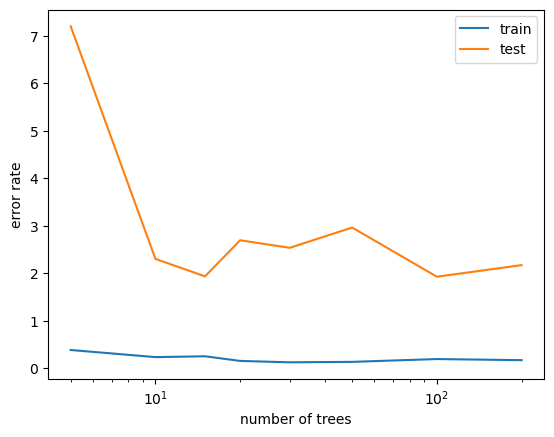

In [12]:
make_num_tree_plot(X_train, y_train, X_val, y_val, (5,10,15,20,30,50,100,200))

In [13]:
import statsmodels.api as sm

model = sm.OLS(y_train, X_train)
results = model.fit()

In [14]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.072
Model:                            OLS   Adj. R-squared (uncentered):              0.028
Method:                 Least Squares   F-statistic:                              1.614
Date:                Fri, 24 Feb 2023   Prob (F-statistic):                      0.0119
Time:                        02:26:20   Log-Likelihood:                         -1188.2
No. Observations:                 823   AIC:                                      2452.
Df Residuals:                     785   BIC:                                      2631.
Df Model:                          38                                                  
Covariance Type:            nonrobust                                                  
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
day_of_the_week            0.0206      0.040      0.519      0.604      -0.057       0.099
month                     -0.0489      0.043     -1.141      0.254      -0.133       0.035
origin                    -0.0599      0.038     -1.561      0.119      -0.135       0.015
dest                      -0.0335      0.038     -0.874      0.383      -0.109       0.042
crs_dep_time               0.0836      0.064      1.307      0.192      -0.042       0.209
taxi_out                   0.1607      0.039      4.091      0.000       0.084       0.238
taxi_in                    0.0812      0.047      1.739      0.083      -0.010       0.173
crs_arr_time              -0.0343      0.058     -0.588      0.557      -0.149       0.080
air_time                   0.3110      0.232      1.338      0.181      -0.145       0.767
distance                  -0.3282      0.231     -1.422      0.155      -0.781       0.125
origin_weather_condn       0.0361      0.049      0.730      0.465      -0.061       0.133
origin_tempc               0.6256      0.505      1.239      0.216      -0.366       1.617
origin_windspeedmiles      0.0005      0.108      0.004      0.996      -0.211       0.212
origin_winddir16point      0.0306      0.039      0.785      0.433      -0.046       0.107
origin_windgustmiles      -0.0156      0.108     -0.144      0.885      -0.228       0.197
origin_windchillc         -0.4621      0.487     -0.949      0.343      -1.418       0.493
origin_precipinches       -0.0352      0.042     -0.838      0.402      -0.118       0.047
origin_humidity            0.1845      0.134      1.381      0.168      -0.078       0.447
origin_visibilitymiles    -0.0073      0.047     -0.156      0.876      -0.100       0.085
origin_pressureinches      0.0897      0.040      2.227      0.026       0.011       0.169
origin_dewpointc          -0.1661      0.208     -0.800      0.424      -0.574       0.241
origin_cloudcover         -0.0299      0.051     -0.584      0.559      -0.131       0.071
origin_uvindex             0.0201      0.069      0.290      0.772      -0.116       0.156
dest_weather_condn         0.0540      0.050      1.083      0.279      -0.044       0.152
dest_tempc                 0.4129      0.564      0.732      0.464      -0.695       1.520
dest_windspeedmiles       -0.0109      0.108     -0.101      0.920      -0.223       0.202
dest_winddir16point       -0.0058      0.040     -0.146      0.884      -0.083       0.072
dest_windgustmiles        -0.0150      0.106     -0.141      0.888      -0.224       0.194
dest_windchillc           -0.3717      0.561     -0.663      0.508      -1.473       0.729
dest_precipinches          0.0338      0.039      0.859      0.391      

In [16]:
random_forest = RandomForestRegressor(n_estimators= 35)

In [17]:
from rfpimp import *
import warnings
warnings.filterwarnings('ignore')

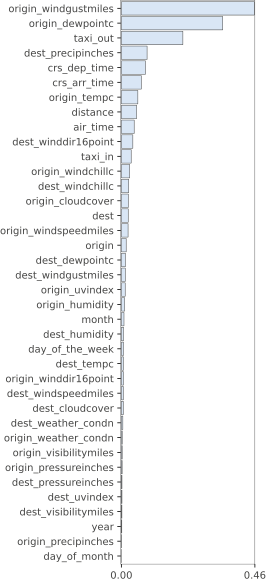

In [18]:
random_forest.fit(X_train, y_train)
I = importances(random_forest, X_train, y_train)
plt.savefig('D:\Python(New)\Project\Mid_Term_Project\Colin\pictures\\important_predict.png')  
plot_importances(I)

In [19]:
random_forest.predict(X_val)

array([-2.36048658e-01, -1.33134710e-01,  9.67099910e-01, -2.76319333e-01,
        1.40272634e-02, -1.82887105e-02,  5.97667957e-02,  3.98800426e-02,
       -1.91303463e-01,  1.79087315e-01,  2.44678088e-02, -2.74827827e-01,
       -3.17122689e-02, -8.64008402e-02, -2.56929749e-01, -7.84461389e-02,
       -1.49044113e-01, -2.32568476e-01, -1.33170222e-02, -1.09767775e-01,
        6.09635521e-01, -1.95777983e-01,  6.92130035e-02,  1.12963861e-01,
        3.90384068e-01, -1.58490321e-01,  5.28064321e-02, -2.52952398e-01,
       -1.80365749e-01,  1.25357569e-02, -6.94971000e-02,  1.80046140e-02,
       -1.72908217e-01,  1.26387419e-01, -4.02600216e-01, -1.14739463e-01,
        5.78811054e-01, -1.00321567e-01, -6.94971000e-02,  4.70428249e-01,
       -2.74330658e-01, -2.78805177e-01, -2.09201541e-01, -3.11121151e-01,
        2.04904582e-02,  2.13889133e-01, -1.19711152e-01,  1.52240198e-01,
        6.74267469e-01, -2.57426918e-01,  7.18018326e-01, -1.72908217e-01,
        1.31359107e-01, -

In [20]:
y_val

array([ 4.08388682e-03,  5.08710249e-01,  4.08388682e-03, -6.74551566e-01,
        3.88857049e-02, -2.91731567e-01, -4.81188403e-02, -1.00321567e-01,
       -2.04727022e-01,  5.08710249e-01, -3.78736112e-01,  3.17104933e+00,
       -1.33170222e-02, -5.35344293e-01, -4.30938839e-01,  1.13514297e+00,
       -2.74330658e-01, -2.39528840e-01, -3.78736112e-01, -6.22348839e-01,
        1.11774207e+00, -3.78736112e-01,  5.08710249e-01, -3.09132476e-01,
       -8.29206584e-02, -2.39528840e-01,  8.21926612e-01, -2.74330658e-01,
       -3.96137021e-01,  7.34922067e-01, -1.52524295e-01, -4.13537930e-01,
       -6.22348839e-01,  1.95493886e-01, -6.22348839e-01, -1.52524295e-01,
        1.25890250e-01, -3.61335203e-01, -5.00542475e-01,  1.08489341e-01,
       -6.22348839e-01, -2.74330658e-01,  8.39327521e-01, -1.35123386e-01,
       -6.57150657e-01,  3.88857049e-02, -2.22127931e-01, -2.91731567e-01,
       -8.29206584e-02, -5.70146112e-01, -4.13537930e-01, -2.04727022e-01,
       -2.91731567e-01, -